<a href="https://colab.research.google.com/github/paulynamagana/Covid19_Pneumonia_Classification/blob/main/classification_covid_pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np


# Do Matplotlib extension below

# use this savefig call at the end of your graph instead of using plt.show()

# plt.savefig('static/images/my_plots.png')



In [13]:
#create data generator
print("\nLoading training data...")

training_data_generator = ImageDataGenerator(
    rescale=1.0/255,
    zoom_range=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05)

CLASS_MODE = "categorical"
COLOR_MODE= "grayscale"
TARGET_SIZE= (256,256)
BATCH_SIZE= 32

training_iterator= training_data_generator.flow_from_directory(
    "Covid19-dataset/train",
    class_mode = CLASS_MODE,
    color_mode= COLOR_MODE,
    target_size = TARGET_SIZE,
    batch_size = BATCH_SIZE)

sample_batch_input, sample_batch_labels = training_iterator.next()
print(sample_batch_input.shape, sample_batch_labels.shape)


Loading training data...
Found 251 images belonging to 3 classes.
(18, 256, 256, 1) (18, 3)


In [14]:
#test data iterator
print("\nLoading validation data...")

test_data_generator = ImageDataGenerator(
        rescale=1.0/255)

test_iterator = test_data_generator.flow_from_directory(
        'Covid19-dataset/test',
        class_mode=CLASS_MODE,
        color_mode=COLOR_MODE,
        batch_size=BATCH_SIZE)
print("\nBuilding model...")


Loading validation data...
Found 66 images belonging to 3 classes.

Building model...


In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = (256, 256, 1)))
model.add(tf.keras.layers.Conv2D(2, 5, strides=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(5, 5), strides=(5,5)))
model.add(tf.keras.layers.Conv2D(4, 3, strides=2, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3,activation="softmax"))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 86, 86, 2)         52        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 17, 17, 2)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 4)           76        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 4)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                

In [24]:
print("\nCompiling model...")
#3) Compile the model with an Adam optimizer, Categorical Cross Entropy Loss, and Accuracy and AUC metrics:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  loss=tf.keras.losses.CategoricalCrossentropy() ,
  metrics=[tf.keras.metrics.CategoricalAccuracy(),
  tf.keras.metrics.AUC()]
)


Compiling model...


In [25]:
print("\nTraining model...")
#4) Use model.fit(...) to train and validate our model for 5 epochs:
history = model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/BATCH_SIZE,
        epochs=5,
        validation_data=test_iterator ,
        validation_steps=test_iterator.samples/BATCH_SIZE)


Training model...
Epoch 1/5
13/13 [==============================] - 5s 297ms/step - loss: 0.5745 - categorical_accuracy: 0.7769 - auc_3: 0.9279 - val_loss: 0.6186 - val_categorical_accuracy: 0.8030 - val_auc_3: 0.9189
Epoch 2/5
13/13 [==============================] - 4s 250ms/step - loss: 0.5925 - categorical_accuracy: 0.7809 - auc_3: 0.9195 - val_loss: 0.5824 - val_categorical_accuracy: 0.8182 - val_auc_3: 0.9339
Epoch 3/5
13/13 [==============================] - 4s 255ms/step - loss: 0.5663 - categorical_accuracy: 0.7849 - auc_3: 0.9309 - val_loss: 0.6040 - val_categorical_accuracy: 0.8030 - val_auc_3: 0.9174
Epoch 4/5
13/13 [==============================] - 4s 300ms/step - loss: 0.5721 - categorical_accuracy: 0.7769 - auc_3: 0.9242 - val_loss: 0.5859 - val_categorical_accuracy: 0.8030 - val_auc_3: 0.9271
Epoch 5/5
13/13 [==============================] - 4s 257ms/step - loss: 0.5471 - categorical_accuracy: 0.7928 - auc_3: 0.9304 - val_loss: 0.5653 - val_categorical_accuracy: 0.7

In [28]:
test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predictions = model.predict(test_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = np.math.ceil(test_iterator.samples / test_iterator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_iterator.classes
class_labels = list(test_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

              precision    recall  f1-score   support

       Covid       0.30      0.27      0.29        26
      Normal       0.21      0.15      0.18        20
   Pneumonia       0.24      0.35      0.29        20

    accuracy                           0.26        66
   macro avg       0.25      0.26      0.25        66
weighted avg       0.26      0.26      0.25        66

[[ 7  6 13]
 [ 8  3  9]
 [ 8  5  7]]


KeyError: 'auc'

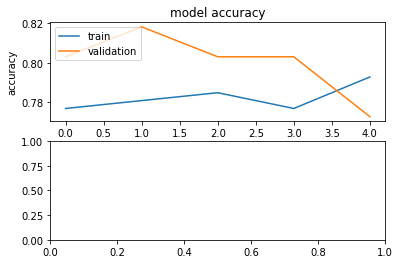

In [26]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')

# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

# used to keep plots from overlapping
fig.tight_layout()
fig.savefig('static/images/my_plots.png')